<a href="https://colab.research.google.com/github/bpizarrogalleguillos/IAmetodologia2025/blob/main/FINAL_chest_pneumonia_classify_monai_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chest Pneumonia Classify MONAI Pytorch
This notebook referred to <br/>
https://colab.research.google.com/drive/1wy8XUSnNWlhDNazFdvGBHLfdkGvOHBKe

https://www.kaggle.com/code/stpeteishii/chest-pneumonia-classify-monai-pytorch/notebook

## What is MONAI?
https://github.com/Project-MONAI/MONAI
- MONAI is a PyTorch-based, open-source framework for deep learning in healthcare imaging, part of PyTorch Ecosystem.
- flexible pre-processing for multi-dimensional medical imaging data;
- compositional & portable APIs for ease of integration in existing workflows;
- domain-specific implementations for networks, losses, evaluation metrics and more;
- customizable design for varying user expertise;
- multi-GPU data parallelism support.


## Install MONAI

In [ ]:
!pip install -q "monai-weekly[gdown, nibabel, tqdm, itk]"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.0/28.0 MB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.5/28.5 MB 32.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 21.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 33.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 25.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/

In [ ]:
!pip install opencv-python

In [ ]:
import cv2
import os
import shutil
import tempfile
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report
import torch
from monai.apps import download_and_extract
from monai.config import print_config
from monai.metrics import ROCAUCMetric
from monai.networks.nets import DenseNet121
from monai.transforms import *
from monai.data import Dataset, DataLoader
from monai.utils import set_determinism

#print_config()

In [ ]:
#!wget https://github.com/bpizarrogalleguillos/IAmetodologia2025/blob/main/kaggle.json

In [ ]:
# Crear carpeta oculta .kaggle
!mkdir -p ~/.kaggle

# Mover kaggle.json al directorio correcto
!cp kaggle.json ~/.kaggle/

# Establecer permisos
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# 📥 Descargar dataset desde Kaggle (Chest X-Ray Pneumonia)
!pip install kaggle
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
License(s): other


In [ ]:
# 🗃️ Descomprimir el archivo ZIP
!unzip chest-xray-pneumonia.zip

Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0447-0001.jpeg  
  

## Read image filenames from the dataset folders

In [ ]:
train_dir = 'chest_xray/train/'
test_dir = 'chest_xray/test/'
val_dir = 'chest_xray/val/'

class_names0 = sorted([x for x in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, x))])
class_names=['NORMAL', 'PNEUMONIA']

num_class = len(class_names)

image_files = [[os.path.join(train_dir, class_name, x)
               for x in os.listdir(os.path.join(train_dir, class_name))]
               for class_name in class_names]
test_image_files = [[os.path.join(test_dir, class_name, x)
               for x in os.listdir(os.path.join(test_dir, class_name))]
               for class_name in class_names]
val_image_files = [[os.path.join(val_dir, class_name, x)
               for x in os.listdir(os.path.join(val_dir, class_name))]
               for class_name in class_names]

print(class_names)

['NORMAL', 'PNEUMONIA']


In [ ]:
image_file_list = []
image_label_list = []
for i, class_name in enumerate(class_names):
    image_file_list.extend(image_files[i])
    image_label_list.extend([i] * len(image_files[i]))
num_total = len(image_label_list)
print(image_file_list[0:10])

test_image_file_list = []
test_image_label_list = []
for i, class_name in enumerate(class_names):
    test_image_file_list.extend(test_image_files[i])
    test_image_label_list.extend([i] * len(test_image_files[i]))
test_num_total = len(test_image_label_list)
print(test_image_file_list[0:10])

val_image_file_list = []
val_image_label_list = []
for i, class_name in enumerate(class_names):
    val_image_file_list.extend(val_image_files[i])
    val_image_label_list.extend([i] * len(val_image_files[i]))
val_num_total = len(val_image_label_list)
print(val_image_file_list[0:10])

['chest_xray/train/NORMAL/NORMAL2-IM-0408-0001.jpeg', 'chest_xray/train/NORMAL/NORMAL2-IM-1288-0001.jpeg', 'chest_xray/train/NORMAL/NORMAL2-IM-1089-0001.jpeg', 'chest_xray/train/NORMAL/NORMAL2-IM-1064-0001.jpeg', 'chest_xray/train/NORMAL/IM-0727-0001.jpeg', 'chest_xray/train/NORMAL/NORMAL2-IM-1376-0001.jpeg', 'chest_xray/train/NORMAL/NORMAL2-IM-1308-0001.jpeg', 'chest_xray/train/NORMAL/NORMAL2-IM-1277-0001.jpeg', 'chest_xray/train/NORMAL/IM-0276-0001.jpeg', 'chest_xray/train/NORMAL/NORMAL2-IM-0493-0001.jpeg']
['chest_xray/test/NORMAL/NORMAL2-IM-0302-0001.jpeg', 'chest_xray/test/NORMAL/NORMAL2-IM-0219-0001.jpeg', 'chest_xray/test/NORMAL/NORMAL2-IM-0107-0001.jpeg', 'chest_xray/test/NORMAL/NORMAL2-IM-0252-0001.jpeg', 'chest_xray/test/NORMAL/NORMAL2-IM-0285-0001.jpeg', 'chest_xray/test/NORMAL/NORMAL2-IM-0348-0001.jpeg', 'chest_xray/test/NORMAL/NORMAL2-IM-0326-0001.jpeg', 'chest_xray/test/NORMAL/NORMAL2-IM-0292-0001.jpeg', 'chest_xray/test/NORMAL/NORMAL2-IM-0362-0001.jpeg', 'chest_xray/test

In [ ]:
image_width, image_height = Image.open(image_file_list[0]).size

print('Total image count:', num_total)
print("Image dimensions:", image_width, "x", image_height)
print("Label names:", class_names)
print("Label counts:", [len(image_files[i]) for i in range(num_class)])

Total image count: 5216
Image dimensions: 1978 x 1766
Label names: ['NORMAL', 'PNEUMONIA']
Label counts: [1341, 3875]


## Visualise some examples

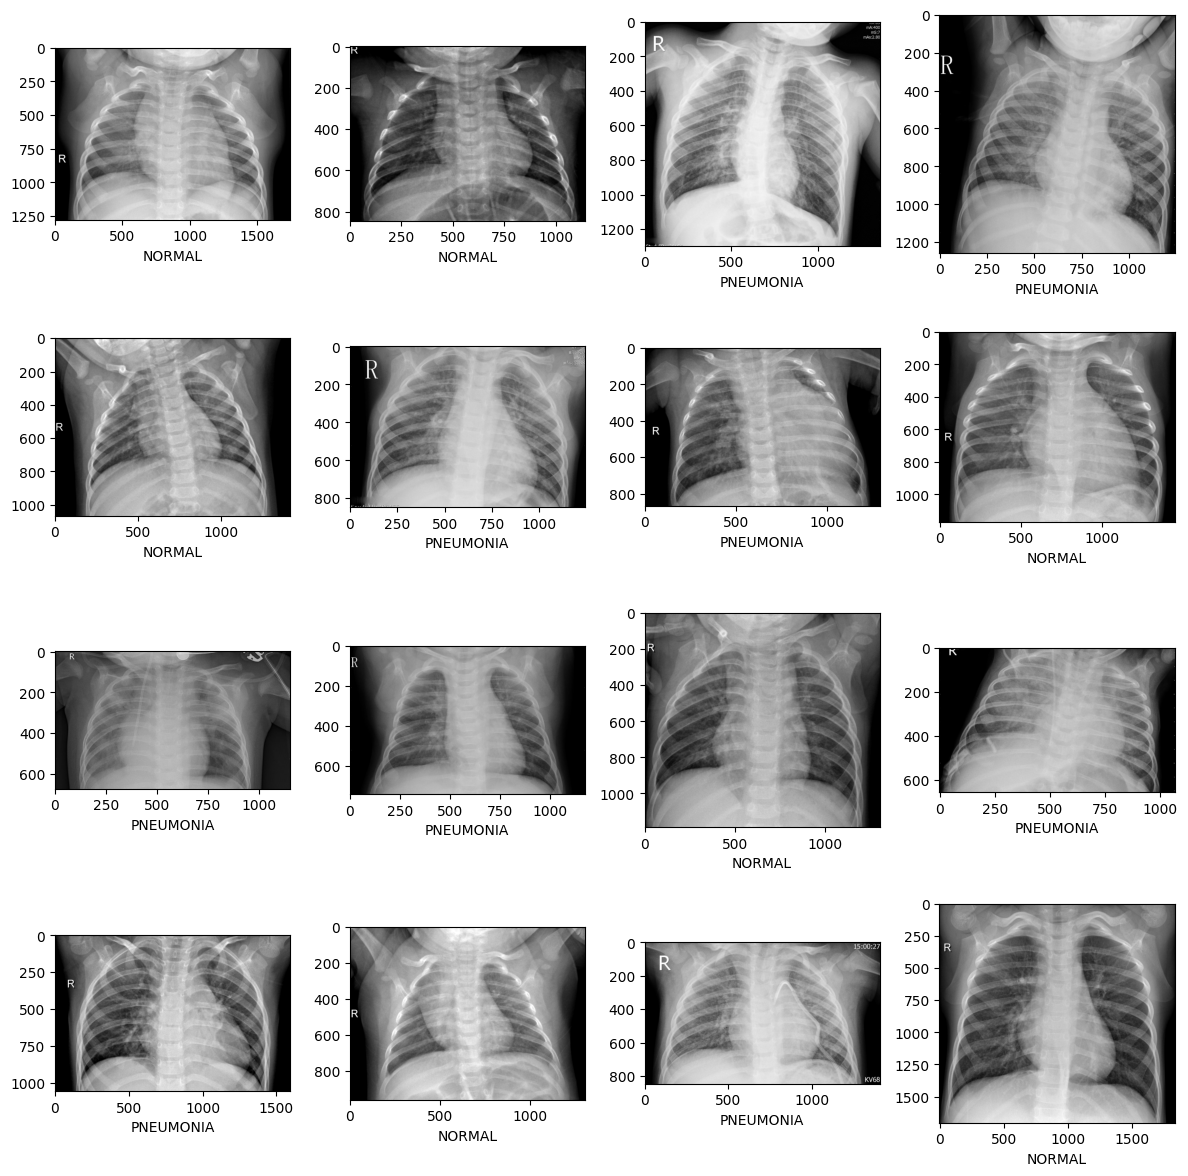

In [ ]:
plt.subplots(4,4, figsize=(12,12))
for i,k in enumerate(np.random.randint(num_total, size=16)):
    im = Image.open(image_file_list[k])
    arr = np.array(im)
    plt.subplot(4,4, i + 1)
    plt.xlabel(class_names[image_label_list[k]])
    plt.imshow(arr, cmap='gray', vmin=0, vmax=255)
plt.tight_layout()
plt.show()

## Prepare training, validation and test data lists

In [ ]:
#valid_frac, test_frac = 0.1, 0.1
trainX, trainY = [], []
valX, valY = [], []
testX, testY = [], []

#rann = np.random.random()
for i in range(val_num_total):
        valX.append(val_image_file_list[i])
        valY.append(val_image_label_list[i])

for i in range(test_num_total):
        testX.append(test_image_file_list[i])
        testY.append(test_image_label_list[i])

for i in range(num_total):
        trainX.append(image_file_list[i])
        trainY.append(image_label_list[i])

print(len(trainX),len(valX),len(testX))

5216 16 624


## Define MONAI transforms, Dataset and Dataloader to pre-process data

In [ ]:
from monai.transforms import (
    Compose, LoadImaged, EnsureChannelFirstd,
    ResizeWithPadOrCropd, ScaleIntensityd, ToTensord
)
from monai.data import Dataset, DataLoader
import os
from glob import glob

def convert_to_grayscale(img):
    # Si la imagen tiene 3 canales, convertirla a escala de grises
    if img.shape[0] == 3:
        return img[0:1] * 0.2989 + img[1:2] * 0.5870 + img[2:3] * 0.1140
    return img

data_dir = "chest_xray"  # Ajusta si tienes otra ruta

def cargar_datos(subdir):
    normal = glob(os.path.join(data_dir, subdir, "NORMAL", "*.jpeg"))
    pneumonia = glob(os.path.join(data_dir, subdir, "PNEUMONIA", "*.jpeg"))
    data = [{"img": path, "label": 0} for path in normal] + [{"img": path, "label": 1} for path in pneumonia]
    return data

train_data = cargar_datos("train")
val_data = cargar_datos("val")
test_data = cargar_datos("test")

transforms = Compose([
    LoadImaged(keys=["img"]),
    EnsureChannelFirstd(keys=["img"]),
    Lambdad(keys=["img"], func=convert_to_grayscale),  # 🔥 Aquí convertimos a 1 canal
    ResizeWithPadOrCropd(keys=["img"], spatial_size=(224, 224)),
    ScaleIntensityd(keys=["img"]),
    ToTensord(keys=["img", "label"])
])

train_ds = Dataset(data=train_data, transform=transforms)
val_ds = Dataset(data=val_data, transform=transforms)
test_ds = Dataset(data=test_data, transform=transforms)

train_loader = DataLoader(train_ds, batch_size=16, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=16, shuffle=False)
test_loader = DataLoader(test_ds, batch_size=16, shuffle=False)

## Define network and optimizer

- Sets the learning rate for the amount of model updates for each batch.
- There are shuffle and random transformations, so set the total number of epochs.
- Use MONAI's DenseNet.
- Use the Adam Optimizer.

In [ ]:
#device = torch.device("cpu")
device = torch.device("cuda:0")   # "cuda:0","cpu"
model = DenseNet121(
    spatial_dims=2,
    in_channels=1,
    out_channels=num_class
).to(device)

loss_function = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), 1e-5)
epoch_num = 1
val_interval = 1

# 🔧 Desactiva todos los ReLU(inplace=True) que causan conflictos con Grad-CAM
for module in model.modules():
    if isinstance(module, torch.nn.ReLU):
        module.inplace = False

## Model training
- Perform common PyTorch training to perform epoch and step loops and validate each epoch.
- If you get the best validation accuracy, save the model weights to a file.

In [ ]:
from monai.networks.utils import one_hot

best_metric = -1
best_metric_epoch = -1
epoch_loss_values = list()
auc_metric = ROCAUCMetric()
metric_values = list()

for epoch in range(epoch_num):
    print('-' * 10)
    print(f"epoch {epoch + 1}/{epoch_num}")
    model.train()
    epoch_loss = 0
    step = 0

    for batch_data in train_loader:     #### error here
        step += 1
        inputs = batch_data["img"].to(device)
        labels = batch_data["label"].to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_function(outputs, labels)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
        print(f"{step}/{len(train_ds) // train_loader.batch_size}, train_loss: {loss.item():.4f}")
        epoch_len = len(train_ds) // train_loader.batch_size

    epoch_loss /= step
    epoch_loss_values.append(epoch_loss)
    print(f"epoch {epoch + 1} average loss: {epoch_loss:.4f}")

    if (epoch + 1) % val_interval == 0:
        model.eval()
        with torch.no_grad():
            y_pred = torch.tensor([], dtype=torch.float32, device=device)
            y = torch.tensor([], dtype=torch.long, device=device)
            for val_data in val_loader:
                val_images = val_data["img"].to(device)
                val_labels = val_data["label"].to(device)
                outputs = model(val_images)
                y_pred = torch.cat([y_pred, outputs], dim=0)
                y = torch.cat([y, val_labels], dim=0)

            # CORRECCIÓN aquí
            y_onehot = one_hot(y, num_classes=2)
            y_pred_act = Activations(softmax=True)(y_pred)

            auc_metric(y_pred_act, y_onehot)
            auc_result = auc_metric.aggregate().item()
            auc_metric.reset()
            metric_values.append(auc_result)

            acc_value = torch.eq(y_pred.argmax(dim=1), y)
            acc_metric = acc_value.sum().item() / len(acc_value)

            if acc_metric > best_metric:
                best_metric = acc_metric
                best_metric_epoch = epoch + 1
                torch.save(model.state_dict(), 'best_metric_model.pth')
                print('saved new best metric model')

            print(f"current epoch: {epoch + 1} current AUC: {auc_result:.4f}"
                  f" current accuracy: {acc_metric:.4f} best accuracy: {best_metric:.4f}"
                  f" at epoch: {best_metric_epoch}")

print(f"train completed, best_metric: {best_metric:.4f} at epoch: {best_metric_epoch}")

----------
epoch 1/1
1/326, train_loss: 0.6244
2/326, train_loss: 0.6458
3/326, train_loss: 0.5926
4/326, train_loss: 0.5689
5/326, train_loss: 0.6440
6/326, train_loss: 0.6332
7/326, train_loss: 0.5447
8/326, train_loss: 0.6197
9/326, train_loss: 0.6443
10/326, train_loss: 0.5737
11/326, train_loss: 0.5417
12/326, train_loss: 0.5329
13/326, train_loss: 0.5551
14/326, train_loss: 0.6029
15/326, train_loss: 0.5349
16/326, train_loss: 0.5779
17/326, train_loss: 0.5109
18/326, train_loss: 0.5559
19/326, train_loss: 0.5887
20/326, train_loss: 0.5893
21/326, train_loss: 0.5537
22/326, train_loss: 0.5329
23/326, train_loss: 0.5210
24/326, train_loss: 0.5261
25/326, train_loss: 0.5321
26/326, train_loss: 0.5049
27/326, train_loss: 0.5420
28/326, train_loss: 0.6325
29/326, train_loss: 0.5287
30/326, train_loss: 0.5529
31/326, train_loss: 0.4911
32/326, train_loss: 0.4981
33/326, train_loss: 0.5537
34/326, train_loss: 0.5690
35/326, train_loss: 0.6275
36/326, train_loss: 0.4443
37/326, train_lo

## Plot the loss and metric

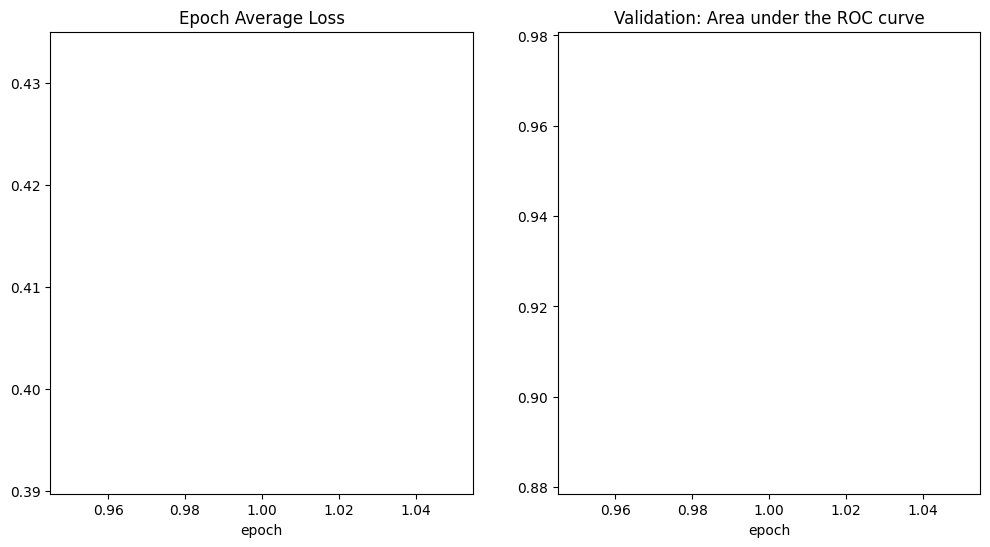

In [ ]:
plt.figure('train', (12, 6))
plt.subplot(1, 2, 1)
plt.title("Epoch Average Loss")
x = [i + 1 for i in range(len(epoch_loss_values))]
y = epoch_loss_values
plt.xlabel('epoch')
plt.plot(x, y)
plt.subplot(1, 2, 2)
plt.title("Validation: Area under the ROC curve")
x = [val_interval * (i + 1) for i in range(len(metric_values))]
y = metric_values
plt.xlabel('epoch')
plt.plot(x, y)
plt.show()

## Evaluate the model on test dataset
- After training and verification, we have already obtained the best model in the verification test.
- You should evaluate your model in a test dataset to see if it is robust and overfitting.

In [ ]:
model.load_state_dict(torch.load('best_metric_model.pth'))
model.eval()

y_true = []
y_pred = []

with torch.no_grad():
    for test_data in test_loader:
        test_images = test_data["img"].to(device)
        test_labels = test_data["label"].to(device)
        pred = model(test_images).argmax(dim=1)

        for i in range(len(pred)):
            y_true.append(test_labels[i].item())
            y_pred.append(pred[i].item())

In [ ]:
print(classification_report(y_true, y_pred, target_names=class_names, digits=4))

              precision    recall  f1-score   support

      NORMAL     0.8000    0.0684    0.1260       234
   PNEUMONIA     0.6391    0.9897    0.7767       390

    accuracy                         0.6442       624
   macro avg     0.7195    0.5291    0.4513       624
weighted avg     0.6994    0.6442    0.5327       624



In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, ConfusionMatrixDisplay
import numpy as np

In [ ]:
from torch.nn import Softmax

model.load_state_dict(torch.load('best_metric_model.pth'))
model.eval()

y_true = []
y_pred = []
y_pred_probs = []

softmax = Softmax(dim=1)

with torch.no_grad():
    for test_data in test_loader:
        test_images = test_data["img"].to(device)
        test_labels = test_data["label"].to(device)
        outputs = model(test_images)

        probs = softmax(outputs)  # ⬅️ convertimos a probabilidad
        preds = torch.argmax(probs, dim=1)

        y_true.extend(test_labels.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())
        y_pred_probs.extend(probs[:, 1].cpu().numpy())  # clase 1: neumonía

<Figure size 600x600 with 0 Axes>

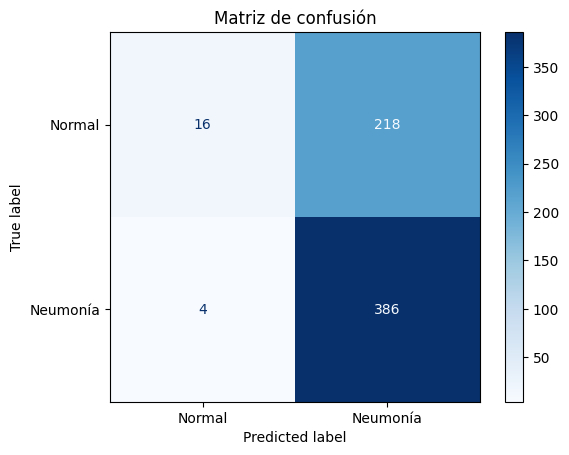

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Normal", "Neumonía"])

plt.figure(figsize=(6,6))
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Matriz de confusión")
plt.grid(False)
plt.show()

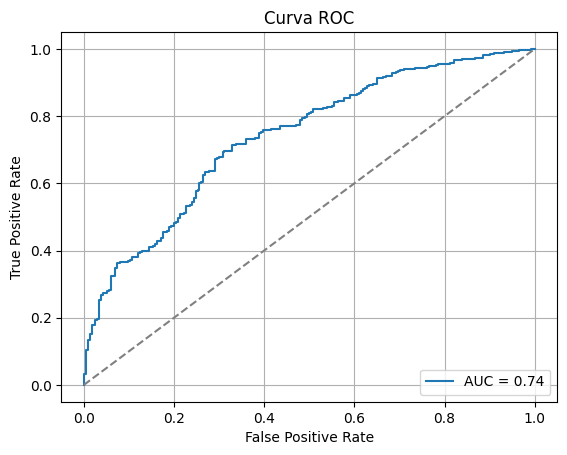

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, _ = roc_curve(y_true, y_pred_probs)
roc_auc = roc_auc_score(y_true, y_pred_probs)

plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Grad-Cams


In [ ]:
import torch
import torch.nn.functional as F
import numpy as np
import cv2
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider
from monai.transforms import LoadImage
from PIL import Image, ImageOps

raw_test_data = cargar_datos("test")  # lista de diccionarios
test_ds = Dataset(data=raw_test_data, transform=transforms)

# Clase real e índice de predicción → Grad-CAM
def compute_gradcam(input_tensor, model, target_layer, pred_index=None):
    activation = None
    gradient = None

    def forward_hook(module, input, output):
        nonlocal activation
        activation = output

    def backward_hook(module, grad_in, grad_out):
        nonlocal gradient
        gradient = grad_out[0]

    # Registrar hooks
    handle_fw = target_layer.register_forward_hook(forward_hook)
    handle_bw = target_layer.register_backward_hook(backward_hook)

    model.zero_grad()
    output = model(input_tensor)

    if pred_index is None:
        pred_index = output.argmax(dim=1)

    class_score = output[0, pred_index]
    class_score.backward()

    weights = torch.mean(gradient, dim=(2, 3), keepdim=True)
    cam = torch.sum(weights * activation, dim=1).squeeze()
    cam = F.relu(cam)

    cam = cam - cam.min()
    cam = cam / cam.max()
    cam = cam.cpu().detach().numpy()

    handle_fw.remove()
    handle_bw.remove()

    return cam, pred_index.item()

# Mostrar imagen y Grad-CAM en la imagen original
def show_gradcam(idx):
    sample = test_ds[idx]
    input_tensor = sample["img"].unsqueeze(0).to(device)
    label = sample["label"]

    # ✅ Path directo desde la lista cruda
    original_path = raw_test_data[idx]["img"]

    # Imagen original sin procesar
    # 🔁 Cargar imagen y corregir orientación EXIF
    original_image = Image.open(original_path).convert("L")
    original_image = ImageOps.exif_transpose(original_image)
    original_image_np = np.array(original_image)
    if original_image_np.ndim == 3:
        original_image_np = original_image_np[:, :, 0]

    cam, pred_class = compute_gradcam(input_tensor, model, model.features.denseblock3)
    cam = cv2.resize(cam, (original_image_np.shape[1], original_image_np.shape[0]), interpolation=cv2.INTER_LINEAR)

    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.title("Imagen original (completa)")
    plt.imshow(original_image_np, cmap="gray")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title("Grad-CAM")
    plt.imshow(original_image_np, cmap="gray")
    plt.imshow(cam, cmap='jet', alpha=0.5)
    plt.axis('off')

    plt.suptitle(f"Etiqueta real: {class_names[label]} | Predicción: {class_names[pred_class]}")
    plt.show()

# Activar visualización interactiva
interact(show_gradcam, idx=IntSlider(min=0, max=len(test_ds)-1, step=1, value=0));

interactive(children=(IntSlider(value=0, description='idx', max=623), Output()), _dom_classes=('widget-interac…

In [ ]:
import random
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageOps
import torch

def eval_model_and_plot_examples(n_correct=4, n_incorrect=4):
    model.eval()
    correct_samples = []
    incorrect_samples = []

    # Recorremos el dataset de test completo
    for idx in range(len(test_ds)):
        sample = test_ds[idx]
        input_tensor = sample["img"].unsqueeze(0).to(device)
        label = sample["label"]

        with torch.no_grad():
            output = model(input_tensor)
            pred = output.argmax(dim=1).item()

        if pred == label and len(correct_samples) < n_correct * 2:
            correct_samples.append((idx, pred, label))
        elif pred != label and len(incorrect_samples) < n_incorrect * 2:
            incorrect_samples.append((idx, pred, label))

    # Elegimos muestras aleatorias
    correct_selected = random.sample(correct_samples, min(n_correct, len(correct_samples)))
    incorrect_selected = random.sample(incorrect_samples, min(n_incorrect, len(incorrect_samples)))

    total = correct_selected + incorrect_selected
    n_total = len(total)

    # Graficamos
    plt.figure(figsize=(16, 8))
    for i, (idx, pred_class, true_class) in enumerate(total):
        # Cargar tensor e imagen original
        sample = test_ds[idx]
        input_tensor = sample["img"].unsqueeze(0).to(device)

        # Imagen original (corrigiendo rotación)
        image_path = raw_test_data[idx]["img"]
        pil_image = Image.open(image_path).convert("L")
        pil_image = ImageOps.exif_transpose(pil_image)
        original_image_np = np.array(pil_image)

        # Grad-CAM
        cam, _ = compute_gradcam(input_tensor, model, model.features.denseblock3)
        cam = cv2.resize(cam, (original_image_np.shape[1], original_image_np.shape[0]), interpolation=cv2.INTER_LINEAR)

        # Mostrar
        plt.subplot(2, 4, i+1)
        plt.imshow(original_image_np, cmap='gray')
        plt.imshow(cam, cmap='jet', alpha=0.5)
        result = "✅" if pred_class == true_class else "❌"
        plt.title(f"{result} Real: {class_names[true_class]}\nPred: {class_names[pred_class]}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.


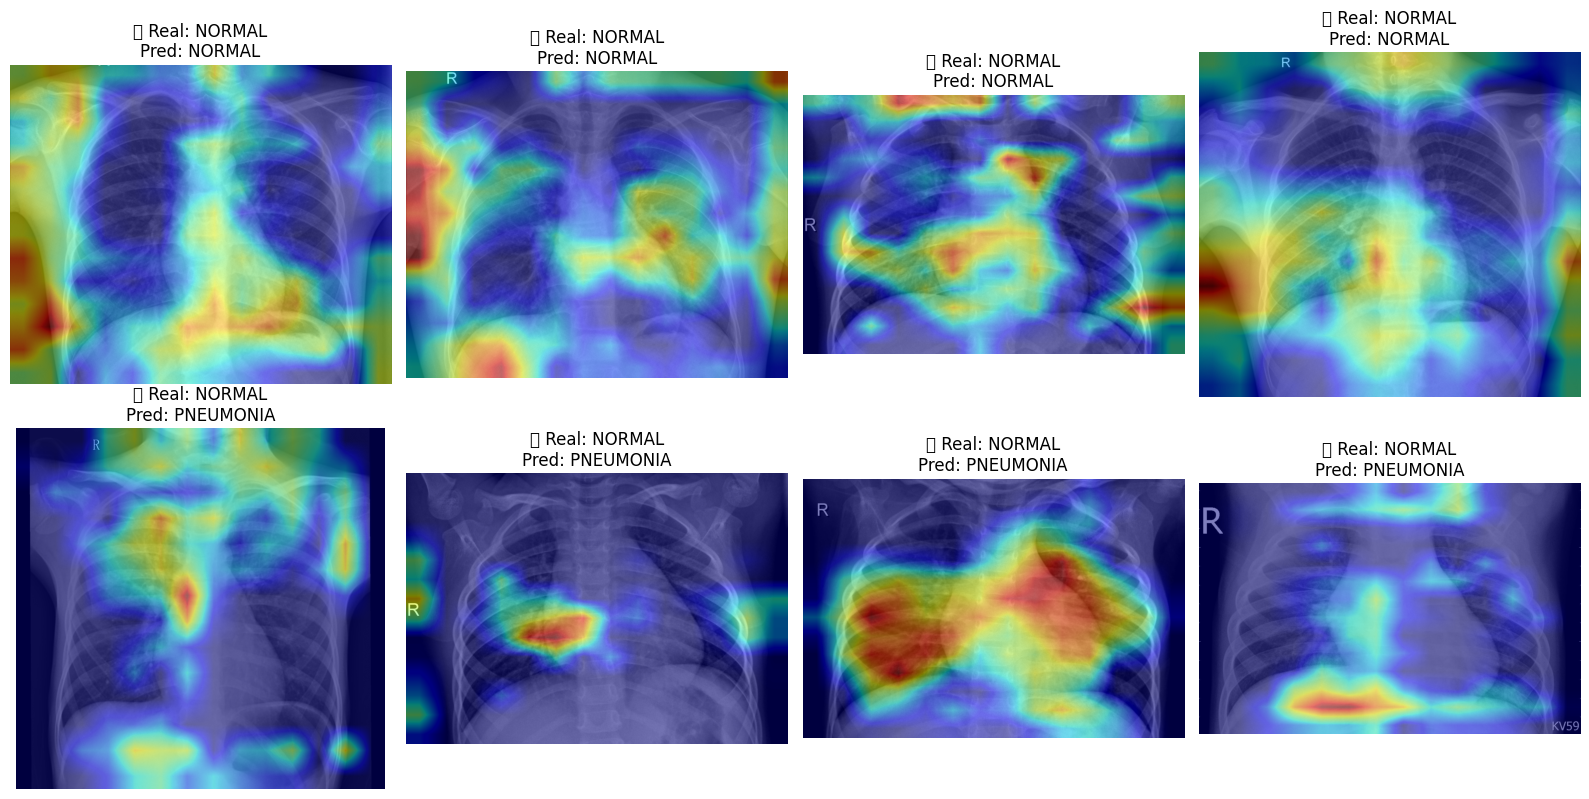

In [ ]:
eval_model_and_plot_examples()

In [ ]:
import torch
import torch.nn.functional as F
import numpy as np
import cv2
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider, FloatSlider
from PIL import Image, ImageOps

def show_gradcam_interactivo(idx, alpha):
    sample = test_ds[idx]
    input_tensor = sample["img"].unsqueeze(0).to(device)
    label = sample["label"]

    # Imagen original con corrección de orientación
    original_path = raw_test_data[idx]["img"]
    original_image = Image.open(original_path).convert("L")
    original_image = ImageOps.exif_transpose(original_image)
    original_image_np = np.array(original_image)

    # Grad-CAM
    cam, pred_class = compute_gradcam(input_tensor, model, model.features.denseblock3)
    cam = cv2.resize(cam, (original_image_np.shape[1], original_image_np.shape[0]), interpolation=cv2.INTER_LINEAR)

    # Visualización
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    plt.title("Imagen original")
    plt.imshow(original_image_np, cmap="gray")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title(f"Grad-CAM (α = {alpha:.2f})")
    plt.imshow(original_image_np, cmap="gray")
    plt.imshow(cam, cmap='jet', alpha=alpha)
    plt.axis('off')

    plt.suptitle(f"Etiqueta real: {class_names[label]} | Predicción: {class_names[pred_class]}")
    plt.show()

# Widgets interactivos
interact(
    show_gradcam_interactivo,
    idx=IntSlider(min=0, max=len(test_ds)-1, step=1, value=0, description="Imagen"),
    alpha=FloatSlider(min=0.0, max=1.0, step=0.05, value=0.5, description="Transparencia")
);

interactive(children=(IntSlider(value=0, description='Imagen', max=623), FloatSlider(value=0.5, description='T…

In [ ]:
#

!pip install gradio --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 MB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 107.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.8 MB/s eta 0:00:00


In [ ]:
import torchvision.transforms as T
from monai.visualize import GradCAM
def predict_with_gradcam(pil_img, alpha):
    # Asegura que sea PIL
    if isinstance(pil_img, np.ndarray):
        pil_img = Image.fromarray(pil_img)

    pil_img = pil_img.convert("L")
    pil_img = ImageOps.exif_transpose(pil_img)
    original_np = np.array(pil_img)
    overlay_base = original_np.copy()

    # Preprocesamiento → [1, 1, 224, 224]
    arr = np.expand_dims(original_np, axis=0)
    arr = torch.tensor(arr, dtype=torch.float32) / 255.0
    arr = T.Resize((224, 224))(arr)
    arr = arr.unsqueeze(0).clone().detach().requires_grad_(True).to(device)

    # Predicción
    model.eval()
    output = model(arr)
    probs = torch.nn.functional.softmax(output, dim=1)
    score = probs[0, 1].item()  # probabilidad de Neumonía
    pred = int(output.argmax(dim=1).item())

    # Grad-CAM
    cam_engine = GradCAM(nn_module=model, target_layers="features.norm5")
    cam_map = cam_engine(x=arr, class_idx=pred)[0, 0].detach().cpu().numpy()
    cam_map = cv2.resize(cam_map, (overlay_base.shape[1], overlay_base.shape[0]))

    # Superposición
    overlay = cv2.applyColorMap(np.uint8(255 * cam_map), cv2.COLORMAP_JET)
    overlay = cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB)
    blended = cv2.addWeighted(cv2.cvtColor(overlay_base, cv2.COLOR_GRAY2RGB), 1.0, overlay, alpha, 0)

    label = f"{class_names[pred]} ({score*100:.1f}%)"
    return Image.fromarray(blended), label, score

In [ ]:
import gradio as gr

demo = gr.Interface(
    fn=predict_with_gradcam,
    inputs=[
        gr.Image(label="Sube una radiografía", type="pil"),
        gr.Slider(0, 1, value=0.4, label="Transparencia Grad-CAM")
    ],
    outputs=[
        gr.Image(label="Grad-CAM sobre imagen"),
        gr.Label(label="Predicción y score"),
        gr.Number(label="Riesgo de neumonía", precision=2)
    ],
    title="Clasificador de Radiografías con Grad-CAM",
    description="Sube una radiografía de tórax y observa la predicción del modelo, el mapa de atención Grad-CAM y la probabilidad estimada."
)

demo.launch(share=True, debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://ed365bd98237233d54.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
